In [60]:
import requests
import json
import pandas as pd

In [13]:
# the whole html code
response_API = requests.get("https://groundhog-day.com/api/v1/groundhogs")
print(response_API.status_code)
parse_json = json.loads(response_API.text)
parse_json

200


{'groundhogs': [{'id': 1,
   'slug': 'punxsutawney-phil',
   'shortname': 'Phil',
   'name': 'Punxsutawney Phil',
   'city': 'Punxsutawney',
   'region': 'Pennsylvania',
   'country': 'USA',
   'coordinates': '40.9311988,-78.9622483',
   'source': 'https://www.groundhog.org/history-past-predictions',
   'contact': '',
   'currentPrediction': 'https://www.cbsnews.com/news/groundhog-day-2023-punxsutawney-phil-prediction/',
   'isGroundhog': 1,
   'type': 'Groundhog',
   'active': 1,
   'description': 'Punxsutawney Phil is a superstar prognosticating groundhog from Punxsutawney, Pennsylvania. He makes his predictions from his burrow on Gobler’s Knob. According to legend, Phil has made weather prognostications since 1886, owing his improbably long life to the miraculous “groundhog nog” administered at the annual Groundhog Picnic.',
   'image': 'https://groundhog-day.com/images/ghogs/punxsutawney-phil.jpeg',
   'predictionsCount': 128,
   'predictions': [{'year': 1886,
     'shadow': None,


In [67]:
#create a database
data = []

for n in range (0, 74):
    id = parse_json.get('groundhogs')[n].get('id')
    name = parse_json.get('groundhogs')[n].get('name')
    predictionsCount = parse_json.get('groundhogs')[n].get('predictionsCount')
    for i in range (0, predictionsCount):
        year = parse_json.get('groundhogs')[n].get('predictions')[i].get('year')
        prediction = parse_json.get('groundhogs')[n].get('predictions')[i].get('shadow')
        data.append([id, name, year, prediction])
data

header = ['id', 'name', 'year', 'prediction']
df = pd.DataFrame(data, columns=header)
df.to_csv('C:/Users/Елена/Downloads/data_training/goundhogs_predictions.csv', sep=';', encoding='utf8')
df.head()


,id,name,year,prediction
0,1,Punxsutawney Phil,1886,NaN
1,1,Punxsutawney Phil,1887,1.0
2,1,Punxsutawney Phil,1888,1.0
3,1,Punxsutawney Phil,1889,NaN
4,1,Punxsutawney Phil,1890,0.0


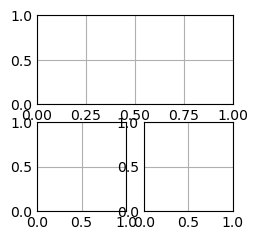

In [68]:
fig = plt.figure()
# Use GridSpec for customising layout
gs = fig.add_gridspec(nrows=2, ncols=2)
# Add an empty axes that occupied the whole first row
ax1 = fig.add_subplot(gs[0, 0:2])
# Add two empty axes that occupied the remaining grid
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])